<a href="https://colab.research.google.com/github/JRafaQuadros91/PandasNumpy2/blob/main/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho T1-2

Responda as questões elencadas abaixo utilizando a linguagem de programação Python e as bibliotecas Pandas, Matplotlib e Seaborn.

Este trabalho consiste em realizar uma análise sobre dados de ocorrências de acidentes de trânsito, ocorridas no ano de 2018. A atividade deve ser entregue com o código **executado**, de maneira que possa ser observada a saída obtida pelo código desenvolvido.

A fonte dos dados e especificações podem ser consultados no portal da Polícia Rodoviária Federal, disponível [aqui](https://portal.prf.gov.br/dados-abertos).

**Dicas**
- Assim como nos DataFrames, nas Series tamém é possível utilizar a função `.head()`.
- A função `.value_counts()` retorna os valores ordenados por quantidade, em ordem decrescente.
- Com a função `.value_counts()` também é possível gerar gráficos, p.ex. `.value_counts().plot()` ou `.value_counts().plot.bar()`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
########################
#Leitura da base no diretório local (Jupyter)
########################
# df = pd.read_csv('./bases/datatran2018.csv', sep=';', encoding='latin-1') # Carrega a base

########################
#Leitura da base no Google Drive (Colaboratory)
########################
from google.colab import drive
drive.mount('/drive') #monta a base no google drive
database_path = '/drive/Shareddrives/BasesPublicas/Bases/PRF/datatran2018.csv' #caminho da base de dados
df = pd.read_csv(database_path, sep=';', encoding='latin-1') #Carrega a base

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df.shape #Mostra o número de linhas e colunas na base

(69295, 30)

In [ ]:
df.info() #Mostra informações sobre a base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69295 entries, 0 to 69294
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      69295 non-null  float64
 1   data_inversa            69295 non-null  object 
 2   dia_semana              69295 non-null  object 
 3   horario                 69295 non-null  object 
 4   uf                      69295 non-null  object 
 5   br                      69181 non-null  float64
 6   km                      69181 non-null  object 
 7   municipio               69295 non-null  object 
 8   causa_acidente          69295 non-null  object 
 9   tipo_acidente           69295 non-null  object 
 10  classificacao_acidente  69295 non-null  object 
 11  fase_dia                69295 non-null  object 
 12  sentido_via             69295 non-null  object 
 13  condicao_metereologica  69295 non-null  object 
 14  tipo_pista              69295 non-null

In [ ]:
df.head(50) #Observa as primeiras linhas da base

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,5,0,0,4,1,0,4,1,"-22,46937","-44,44705",SR-RJ,DEL5/7,UOP03/RJ
1,99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,"0,4",FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,3,0,0,2,1,0,2,2,"-27,59971687","-48,57565694",SR-SC,DEL8/1,UOP01/SC
2,99977.0,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1,ITABORAI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Curva,Não,5,0,1,0,3,1,1,3,"-22,763901","-42,927532",SR-RJ,DEL5/4,UOP02/RJ
3,99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134,SARANDI,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Interseção de vias,Não,2,0,0,0,2,0,0,2,"-27,953636","-52,916374",SR-RS,DEL9/14,UOP01/RS
4,99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,"151,7",CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,1,0,0,1,0,0,1,1,"-31,395214","-53,78391174",SR-RS,DEL9/11,UOP03/RS
5,99984.0,2018-01-01,segunda-feira,01:30:00,RS,386.0,"395,8",TRIUNFO,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Não Informado,Não,1,0,0,0,1,0,0,1,"-29,72837503","-51,6334194",SR-RS,DEL9/4,UOP02/RS
6,99985.0,2018-01-01,segunda-feira,01:00:00,MT,163.0,1033,MATUPA,Ingestão de Álcool,Colisão traseira,Sem Vítimas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,3,0,0,0,3,0,0,2,"-10,209568","-54,963009",SR-MT,DEL2/6,UOP02/MT
7,99986.0,2018-01-01,segunda-feira,02:40:00,SP,116.0,98,PINDAMONHANGABA,Velocidade Incompatível,Saída de leito carroçável,Sem Vítimas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,1,0,0,0,1,0,0,1,"-22,978052","-45,455833",SR-SP,DEL6/6,UOP01/SP
8,99988.0,2018-01-01,segunda-feira,02:50:00,DF,80.0,25,BRASILIA,Falta de Atenção à Condução,Capotamento,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,0,0,0,1,0,1,"-15,62121","-48,198963",SR-DF,UOP06/DF,NaN
9,99989.0,2018-01-01,segunda-feira,02:05:00,SC,470.0,4,NAVEGANTES,Desobediência às normas de trânsito pelo condutor,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Interseção de vias,Sim,3,0,1,0,2,0,1,3,"-26,858473","-48,690788",SR-SC,DEL8/4,UOP04/SC


**Item 01**  
- Qual é o estado que mais teve o maior número de acidentes?

In [ ]:
dfmax = df["uf"].value_counts()
#print(dfmax)
dfmax.max()
dfmax.head(1)


MG    9066
Name: uf, dtype: int64

**Item 02**  
- Apresente a quantidade de acidentes por dia da semana.

In [ ]:
df["dia_semana"].value_counts()

domingo          11283
sábado           11239
sexta-feira      10632
segunda-feira     9422
quinta-feira      9230
quarta-feira      8824
terça-feira       8665
Name: dia_semana, dtype: int64

**Item 03**  
- Apresente a quantidade de acidentes por estado.

In [ ]:
df["uf"].value_counts()

MG    9066
SC    8497
PR    7952
RJ    4575
SP    4516
RS    4445
BA    3555
GO    3464
PE    2715
ES    2642
MT    2631
CE    1697
RO    1629
PB    1588
MS    1530
RN    1416
PI    1371
MA    1272
PA    1260
DF     867
AL     691
TO     589
SE     559
RR     236
AC     235
AP     173
AM     124
Name: uf, dtype: int64

**Item 04**  
- De acordo com a quantidade de acidentes, quais são as 5 rodovias mais perigosas?

In [ ]:
df1 = df["br"].value_counts()
df1.sort_values()
df1.head(5)

101.0    11212
116.0     9972
381.0     3550
40.0      3220
153.0     2834
Name: br, dtype: int64

**Item 05**  
- Considerando apenas acidentes com vítimas fatais, qual rodovia é a mais perigosa?

In [ ]:
df2 = df[df["classificacao_acidente"]=="Com Vítimas Fatais"] 
df3 = df2[["br","classificacao_acidente"]]
df4=df3.value_counts()
df4.sort_values()
df4.head(1)





br     classificacao_acidente
116.0  Com Vítimas Fatais        582
dtype: int64

**Item 06**  
- No Paraná, quais são as 10 cidades do interior que possuiram o maior número de acidentes?

In [ ]:
df5 = df[df["uf"] == "PR"]
df6 = df5[df5["municipio"] != "CURITIBA"]
df7 = df6.value_counts("municipio")
df7.head(10)

municipio
SAO JOSE DOS PINHAIS     448
MARINGA                  443
CASCAVEL                 338
FOZ DO IGUACU            299
CAMPINA GRANDE DO SUL    285
PONTA GROSSA             268
PARANAGUA                178
APUCARANA                156
CAMPO LARGO              153
TIJUCAS DO SUL           152
dtype: int64

**Item 07**  
- Os acidentes com vítimas fatais ocorrem em sua maioria em trechos de curvas ou de reta? Apresente um gráfico indicando estes números.

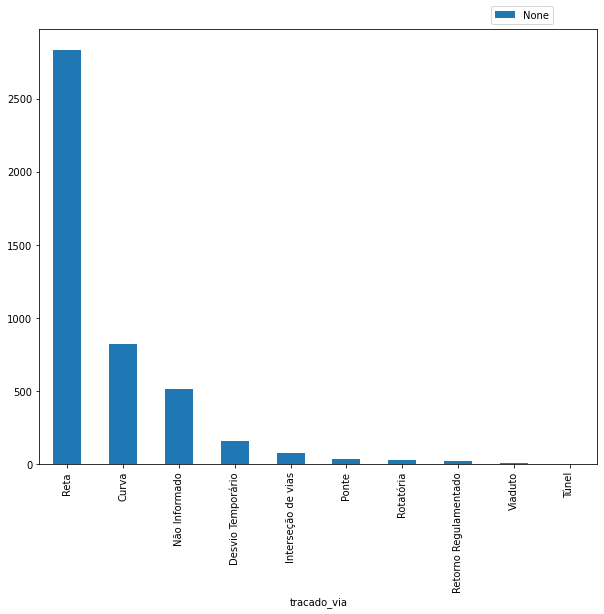

In [ ]:
df8 = df2[["tracado_via"]] #df2 ja tem as classificacoes de acidentes com vitimas fatais
df9 = df8.value_counts("tracado_via")
df9.head()

df9.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()
#Retas tem o maior numero de acidentes

**Item 08**  
- Quais são as 10 maiores causas de acidentes?

In [ ]:
df10 = df["causa_acidente"].value_counts()
df10.head(10)

Falta de Atenção à Condução                          25830
Desobediência às normas de trânsito pelo condutor     7189
Velocidade Incompatível                               6849
Ingestão de Álcool                                    5201
Não guardar distância de segurança                    4262
Defeito Mecânico no Veículo                           3716
Condutor Dormindo                                     2633
Pista Escorregadia                                    2549
Falta de Atenção do Pedestre                          2073
Animais na Pista                                      1614
Name: causa_acidente, dtype: int64

**Item 09**  
- Em que estado ocorre o maior núemro de acidentes em que a causa foi animais na pista?

In [ ]:
df11 = df[df["causa_acidente"]=="Animais na Pista"] 
df12 = df11[["uf","causa_acidente"]]
df13 = df12.value_counts()
df13.sort_values()
df13.head(1)


uf  causa_acidente  
MG  Animais na Pista    198
dtype: int64

**Item 10**  
- Em Cascavel, no Paraná, qual são as rodovias que existem na base de dados?

In [ ]:
df14 = df[df["municipio"] == "CASCAVEL"].value_counts("br")
df14.head(100)

br
277.0    242
467.0     67
369.0     22
163.0      6
116.0      5
dtype: int64

**Item 11**  
- Em Cascavel, no Paraná, qual é a rodovia que mais possui acidentes?

In [ ]:
df14.head(1)

br
277.0    242
dtype: int64

**Item 12**  
- Em Cascavel, no Paraná, em qual kilômetro da rodovia BR 277 ocorreram o maior número de acidentes com vítimas fatais? Obs: por padrão a coluna `br` está com valores do tipo `float`. (`277.0`).

In [ ]:
df15 = df[df["municipio"] == "CASCAVEL"]
df151 = df15[df15["br"] == 277.0]
df16 = df151[["br","km","classificacao_acidente"]]
df161 = df16[df16["classificacao_acidente"]== "Com Vítimas Fatais"].value_counts()
df161.head(100)
#essas 8 rodovias tiveram 1 acidente fatal cada

br     km     classificacao_acidente
277.0  597,3  Com Vítimas Fatais        1
       593    Com Vítimas Fatais        1
       588,4  Com Vítimas Fatais        1
       588,3  Com Vítimas Fatais        1
       584,7  Com Vítimas Fatais        1
       584    Com Vítimas Fatais        1
       577,9  Com Vítimas Fatais        1
       574,3  Com Vítimas Fatais        1
dtype: int64

**Item 13**  
- Gere um gráfico apresentando os dias da semana em que ocorreram mais acidente por causa de Ingestão de Álcool.
- Comente sobre o resultado obtido

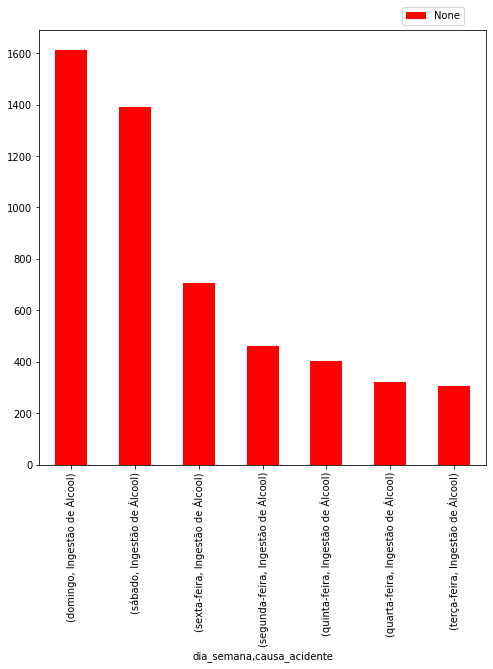

In [ ]:
df19 = df[["dia_semana" , "causa_acidente"]]
df20 = df19[df19["causa_acidente"]=="Ingestão de Álcool"]
df21 = df20.value_counts()
df21.head(7)

df21.plot(kind="bar",stacked=True, color = "red",figsize=(8,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()
#Maior dia da semana com numero de acidentes por ingestão de alcool é domingo. Provavelmente por bebidas ingeridas na madrugada de sabado para domingo , já que sabado
#é o segundo maior dia com acidentes.

**Item 14**  
- Apresente um gráfico que mostre a quantidade de acidentes de acordo com a condição meteorológica, subdividida de acordo com a fase do dia.
- Explique o resultado obtido.

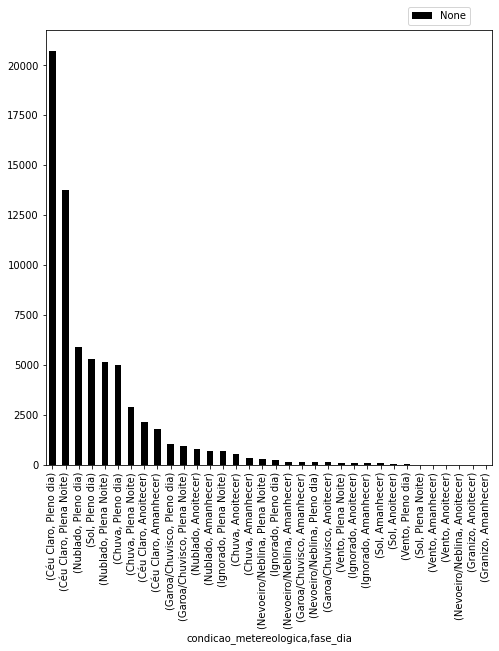

In [ ]:
df22 = df[["condicao_metereologica" , "fase_dia"]]
df23 = df22.value_counts()
df23.head()

df23.plot(kind="bar",stacked=True, color = "black",figsize=(8,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()
#Aqui o grafico está dividido, mostra as condicoes climaticas relacionados com cada fase do dia, podemos ver que a maior quantidade de acidentes se deu em pleno dia com ceu claro
#provavelmente devido ao grande fluxo de veiculos nessas condições.

**Item 15**  
- Realize uma outra análise utilizando algum critério elaborado por você, e explique o resultado obtido.

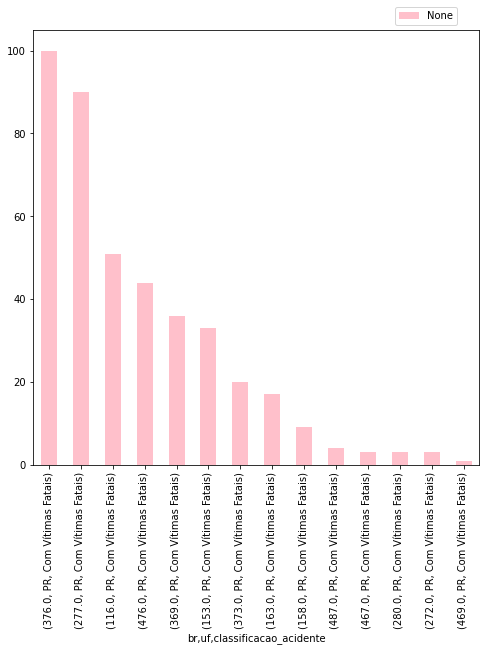

In [ ]:
#mostrar um grafico com a quantidade de acidentes com morte de cada rodovia do parana.

df24 = df[["br" , "uf","classificacao_acidente" ]]
#df24.head()
df25 = df24[df24["uf"]=="PR"]
#df25.head()
df26 = df25[df25["classificacao_acidente"]=="Com Vítimas Fatais"].value_counts()
df26.head(100)

df26.plot(kind="bar",stacked=True, color = "pink",figsize=(8,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

#Mostra que a BR 376 é a que tem o maior numero de mortes no parana. É a Rodovia mais violenta!
